**REQUIREMENTS**
*   Examine transaction data – look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables. If you determine any anomalies make the necessary changes in the dataset and save it. Having clean data will help when it comes to your analysis. 

*   Examine customer data – check for similar issues in the customer data, look for nulls and when you are happy merge the transaction and customer data together so it’s ready for the analysis ensuring you save your files along the way.

*   Data analysis and customer segments – in your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. 

*   Deep dive into customer segments – define your recommendation from your insights, determine which segments we should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis. 

*   Save your analysis in the CSV files and your visualisations  




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the data
transaction_data=pd.read_excel('/content/drive/MyDrive/QVI_transaction_data.xlsx')
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


## **EXAMINING TRANSACTION DATA**

In [ ]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


***DATA WRANGLING***

In [ ]:
#The date column is inconsistent as it is stored in integer format.
#We create a function to convert it to date

import xlrd
import datetime
def xldate_to_datetime(xlserialdate):
  anchor=datetime.datetime(1900,1,1)
  if (xlserialdate < 60):
    delta=datetime.timedelta(days=(xlserialdate - 1))
  else:
    delta=datetime.timedelta(days=(xlserialdate - 2))
  converted_date= anchor + delta
  return converted_date   


In [ ]:
#Apply the date function to the date column
transaction_data['DATE']=transaction_data['DATE'].apply(xldate_to_datetime)

In [ ]:
transaction_data['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

In [ ]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
#Examining shape of the transaction data
transaction_data.shape

(264836, 8)

In [ ]:
#Examining number of unique date in date entry
transaction_data['DATE'].nunique()

364

In [ ]:
#There are 365 days in a year so we check for the specific missing date
pd.date_range(start = '2018-07-01',end='2019-06-30').difference(transaction_data['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [ ]:
transaction_data['PROD_NAME'].head()

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
Name: PROD_NAME, dtype: object

In [ ]:
#Creating a new column by extracting size of pack from 'PROD_NAME'
transaction_data['SIZE_OF_PACK']=transaction_data['PROD_NAME'].str.extract('(\d+)')
transaction_data['SIZE_OF_PACK'] = pd.to_numeric(transaction_data['SIZE_OF_PACK'])
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_OF_PACK
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [ ]:
#Creating a function that removes metadata as well as size of pack from 'PROD_NAME'
import re

def clean_txt(txt):
  txt=re.sub('[&/]','',txt)
  txt=re.sub('\d\w*','',txt)
  return txt

transaction_data['PROD_NAME']=transaction_data['PROD_NAME'].apply(clean_txt)  

In [ ]:
transaction_data['PROD_NAME'].head()

0     Natural Chip        Compny SeaSalt
1                   CCs Nacho Cheese    
2     Smiths Crinkle Cut  Chips Chicken 
3       Smiths Chip Thinly  SCreamOnion 
4    Kettle Tortilla ChpsHnyJlpno Chili 
Name: PROD_NAME, dtype: object

In [ ]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_OF_PACK
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150


In [ ]:
#Dropping 'Salsa' rows in 'PROD_NAME'
transaction_data['PROD_NAME']=transaction_data['PROD_NAME'].apply(lambda x:x.lower())
transaction_data=transaction_data[~transaction_data['PROD_NAME'].str.contains('salsa')]
transaction_data['PROD_NAME']=transaction_data['PROD_NAME'].apply(lambda x:x.title())


In [ ]:
#Checking for outliers in 'PROD_QTY'
transaction_data['PROD_QTY'].value_counts()

2      220070
1       25476
5         415
3         408
4         371
200         2
Name: PROD_QTY, dtype: int64

In [ ]:
#Examining the 200 product quantity bought
transaction_data.loc[transaction_data['PROD_QTY'] == 200,: ]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_OF_PACK
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [ ]:
#Examining the 200 product quantity bought by 'LYLTY_CARD_NBR'
transaction_data.loc[transaction_data['LYLTY_CARD_NBR'] == 226000, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_OF_PACK
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [ ]:
#Since the customer has made large purchases twice in a span of ten months it is safe to conclude he/she is not a retail customer.It is likely they bought it for commercial purposes so we drop the entry from the dataset.
transaction_data.drop(transaction_data.index[transaction_data['LYLTY_CARD_NBR'] == 226000],inplace=True)

In [ ]:
#Checking to see if the entry has been dropped as is is invalid in our analysis
transaction_data.loc[transaction_data['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_OF_PACK


In [ ]:
#Extracting and creating a brand name from 'PROD_NAME'
name=transaction_data['PROD_NAME'].str.partition()
transaction_data['BRAND'] = name[0]
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_OF_PACK,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,Ccs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly Screamonion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshnyjlpno Chili,3,13.8,150,Kettle


In [ ]:
#Identifying unique brand names
transaction_data['BRAND'].unique()

array(['Natural', 'Ccs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'Ww', 'Thins', 'Burger', 'Ncc', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'Grnwves',
       'Tyrrells', 'Cobs', 'French', 'Rrd', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [ ]:
#Some of the brand names are inconsistent in how they are named like 'Woolworths'and 'Ww'
#We rename them into one name for pupose of consistency in the data
transaction_data['BRAND'].replace('Natural','Ncc',inplace=True)
transaction_data['BRAND'].replace('Smith','Smiths',inplace=True)
transaction_data['BRAND'].replace('Ww','Woolworths',inplace=True)
transaction_data['BRAND'].replace('Infzns','Infuzions',inplace=True)
transaction_data['BRAND'].replace('Snbts','Sunbites',inplace=True)
transaction_data['BRAND'].replace(['Grain','Grnwves'],'Grainwaves',inplace=True)
transaction_data['BRAND'].replace(['Rrd','Red'],'Red Rock Deli',inplace=True)
transaction_data['BRAND'].replace('Dorito','Doritos',inplace=True)

transaction_data['BRAND'].unique()

array(['Ncc', 'Ccs', 'Smiths', 'Kettle', 'Grainwaves', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [ ]:
transaction_data.groupby('BRAND').TOT_SALES.sum().sort_values(ascending=False)

#Kettle makes the highest sales from chips while Burger makes the lowest

BRAND
Kettle           390239.8
Doritos          226329.9
Smiths           217492.0
Pringles         177655.5
Infuzions         99047.6
Thins             88852.5
Red Rock Deli     87607.5
Twisties          81522.1
Tostitos          79789.6
Cobs              70569.8
Tyrrells          51647.4
Grainwaves        51617.2
Ncc               42318.0
Woolworths        41059.1
Cheezels          40029.9
Ccs               18078.9
Cheetos           16884.5
Sunbites           9676.4
French             7929.0
Burger             6831.0
Name: TOT_SALES, dtype: float64

In [ ]:
transaction_data.groupby('BRAND').SIZE_OF_PACK.max().sort_values(ascending=False)

#We can see that Smith and Doritos sell the largest pack sizes of chips while Sunbites sells the smallest size of chips

BRAND
Smiths           380
Doritos          380
Cheezels         330
Twisties         270
Burger           220
Grainwaves       210
Woolworths       200
Cheetos          190
Ncc              175
French           175
Thins            175
Tostitos         175
Ccs              175
Kettle           175
Red Rock Deli    165
Tyrrells         165
Pringles         134
Infuzions        110
Cobs             110
Sunbites          90
Name: SIZE_OF_PACK, dtype: int64

In [ ]:
#Creating a pivot table of total sales and date
sales_by_date=pd.pivot_table(transaction_data,values='TOT_SALES',index='DATE',aggfunc='sum')
sales_by_date.head()

,TOT_SALES
DATE,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


In [ ]:
#Creating a dataframe from the pivot table created
sales_by_date_df=pd.DataFrame(index=pd.date_range(start = '2018-07-01',end='2019-06-30'))
sales_by_date_df['TOT_SALES'] = sales_by_date
sales_by_date_df

,TOT_SALES
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0
...,...
2019-06-26,4829.7
2019-06-27,4941.3
2019-06-28,4876.6
2019-06-29,5177.6


***DATA VISUALISATION***

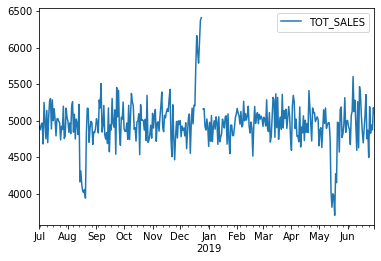

In [ ]:
#Total Sales by date plot

sales_by_date_df.plot()



In [ ]:
#Checking for unique entrie in 'SIZE_OF_PACK'
transaction_data['SIZE_OF_PACK'].unique()

array([175, 170, 150, 330, 210, 270, 220, 125, 110, 134, 380, 180, 165,
       135, 250, 200, 160, 190,  90,  70])

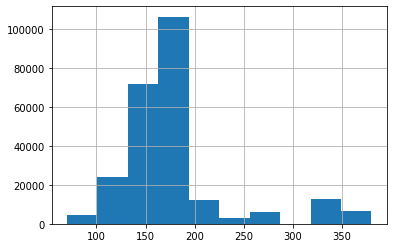

In [ ]:
#Histogram visualisation of size of packs sold
transaction_data['SIZE_OF_PACK'].hist()

**CUSTOMER DATA**

In [ ]:
#Reading customer data
purchase_behaviour=pd.read_csv('/content/drive/MyDrive/QVI_purchase_behaviour.csv')
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
#Examining shape of customer data
purchase_behaviour.shape

(72637, 3)

In [ ]:
#Removing the entry with outliers
purchase_behaviour.drop(purchase_behaviour.index[purchase_behaviour['LYLTY_CARD_NBR'] == 226000],inplace=True)
purchase_behaviour.loc[['LYLTY_CARD_NBR']== 226000:]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [ ]:
#Checking for duplicate entries in 'LYLTY_CARD_NUMBER'
purchase_behaviour['LYLTY_CARD_NBR'].nunique()

72636

In [ ]:
#Checking for duplicate entries in 'LIFESTAGE'
purchase_behaviour['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [ ]:
#Checking for count of each lifestage
purchase_behaviour['LIFESTAGE'].value_counts().sort_values(ascending=False)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9779
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

***DATA VISUALISATION***

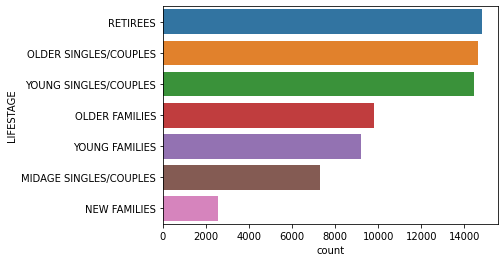

In [ ]:
#Visualisation of lifestage by count
sns.countplot(y=purchase_behaviour['LIFESTAGE'],order=purchase_behaviour['LIFESTAGE'].value_counts().index)

In [ ]:
purchase_behaviour['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

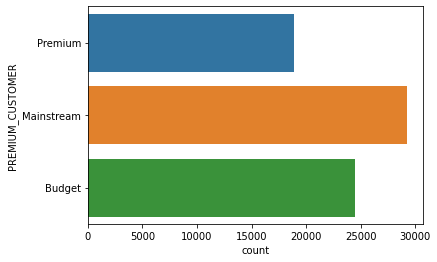

In [ ]:
#Visualisation of 'PREMIUM_CUSTOMER'
sns.countplot(y=purchase_behaviour['PREMIUM_CUSTOMER'])

**MERGING TRANSACTION DATA WITH CUSTOMER DATA**

In [ ]:
#Since transaction data and customer data have a column similar to each other i.e. 'LYLTY_CARD_NBR' we can merge them.


customer_transactions=pd.merge(transaction_data,purchase_behaviour)
customer_transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_OF_PACK,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Ncc,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,Ccs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,Ww Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,Ccs Original,1,2.1,175,Ccs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
customer_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   SIZE_OF_PACK      246740 non-null  int64         
 9   BRAND             246740 non-null  object        
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.5+ MB


**CUSTOMER SEGMENTATION ANALYSIS**

> Having merged our datasets we can derive as well  as visualise some information such as:

- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment






In [ ]:
#'TOT_SALES' by 'LIFESTAGE' and 'PREMIUM_CUSTOMER'
Sales_Lifestage_Premium=pd.DataFrame(customer_transactions.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum())
Sales_Lifestage_Premium.sort_values(by='TOT_SALES',ascending=False)



TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
OLDER FAMILIES         Budget            156863.75
YOUNG SINGLES/COUPLES  Mainstream        147582.20
RETIREES               Mainstream        145168.95
YOUNG FAMILIES         Budget            129717.95
OLDER SINGLES/COUPLES  Budget            127833.60
                       Mainstream        124648.50
                       Premium           123537.55
RETIREES               Budget            105916.30
OLDER FAMILIES         Mainstream         96413.55
RETIREES               Premium            91296.65
YOUNG FAMILIES         Mainstream         86338.25
MIDAGE SINGLES/COUPLES Mainstream         84734.25
YOUNG FAMILIES         Premium            78571.70
OLDER FAMILIES         Premium            75242.60
YOUNG SINGLES/COUPLES  Budget             57122.10
MIDAGE SINGLES/COUPLES Premium            54443.85
YOUNG SINGLES/COUPLES  Premium            39052.30
MIDAGE SINGLES/COUPLES Budget             33345.70
NEW FAMILIES           Budget             20607.45
                       Mainstream         15979.70
                       Premium            10760.80

Text(0, 0.5, 'Total Sales')

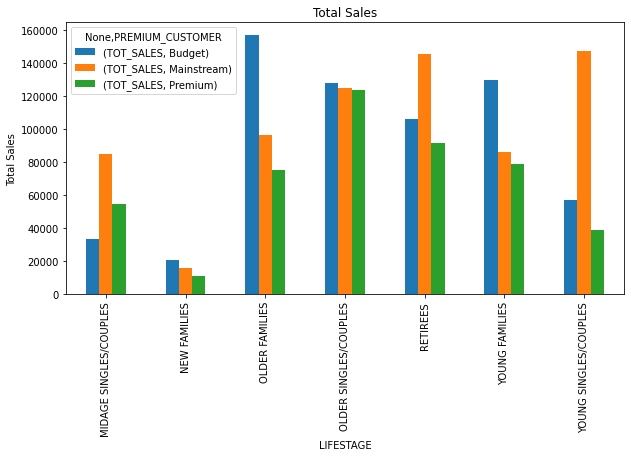

In [ ]:
#Visualisation of Sales_Lifestage_Premium
Sales_Lifestage_Premium.unstack().plot(kind='bar',stacked=False,figsize=(10,5),title='Total Sales')
plt.ylabel('Total Sales')



In [ ]:
#Are higher sales generated by more customers
customers_per_segment=pd.DataFrame(customer_transactions.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
customers_per_segment.sort_values(by='LYLTY_CARD_NBR',ascending=False)

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES  Mainstream                  7917
RETIREES               Mainstream                  6358
OLDER SINGLES/COUPLES  Mainstream                  4858
                       Budget                      4849
                       Premium                     4682
OLDER FAMILIES         Budget                      4611
RETIREES               Budget                      4385
YOUNG FAMILIES         Budget                      3953
RETIREES               Premium                     3812
YOUNG SINGLES/COUPLES  Budget                      3647
MIDAGE SINGLES/COUPLES Mainstream                  3298
OLDER FAMILIES         Mainstream                  2788
YOUNG FAMILIES         Mainstream                  2685
YOUNG SINGLES/COUPLES  Premium                     2480
YOUNG FAMILIES         Premium                     2398
MIDAGE SINGLES/COUPLES Premium                     2369
OLDER FAMILIES         Premium                     2231
MIDAGE SINGLES/COUPLES Budget                      1474
NEW FAMILIES           Budget                      1087
                       Mainstream                   830
                       Premium                      575

Text(0, 0.5, 'Number of Customers')

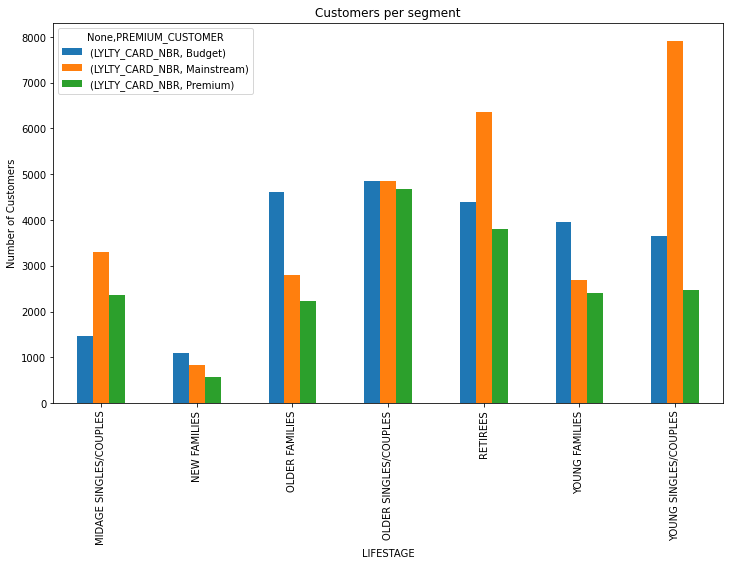

In [ ]:
#Visualisation of Customer_per_segment
customers_per_segment.unstack().plot(kind='bar',stacked=False,figsize=(12,7),title='Customers per segment')
plt.ylabel('Number of Customers')

In [ ]:
#Chips bought by a customer on average
chip_avg_unit=customer_transactions.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).PROD_QTY.sum() / customer_transactions.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique()
chip_avg_unit.sort_values(ascending=False)

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Mainstream          9.255380
                        Budget              9.076773
                        Premium             9.071717
YOUNG FAMILIES          Budget              8.722995
                        Premium             8.716013
                        Mainstream          8.638361
OLDER SINGLES/COUPLES   Budget              6.781398
                        Premium             6.769543
                        Mainstream          6.712021
MIDAGE SINGLES/COUPLES  Mainstream          6.432080
RETIREES                Budget              6.141847
                        Premium             6.103358
MIDAGE SINGLES/COUPLES  Premium             6.078514
                        Budget              6.026459
RETIREES                Mainstream          5.925920
NEW FAMILIES            Mainstream          4.891566
                        Budget              4.821527
                        Premium             4.815652
YOUNG

Text(0, 0.5, 'Average chips bought by customers in each segment')

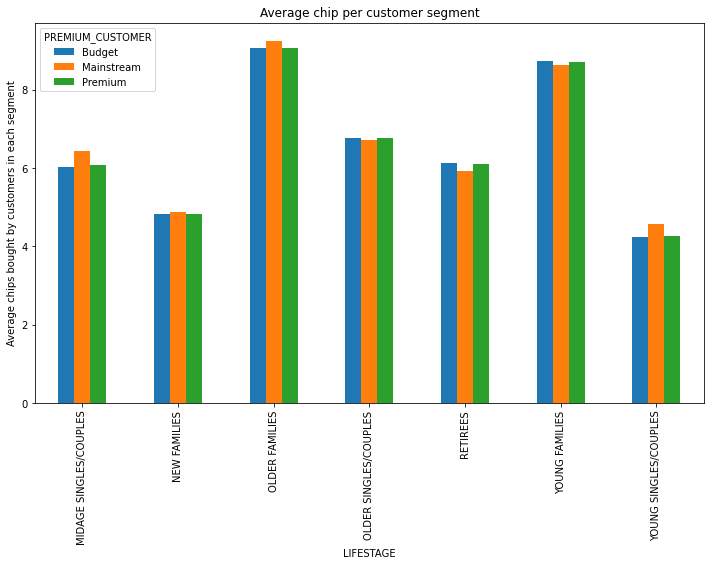

In [ ]:
#Visualisation of average chips bought by a customer segment

chip_avg_unit.unstack().plot(kind='bar',stacked=False,figsize=(12,7),title='Average chip per customer segment')
plt.ylabel('Average chips bought by customers in each segment')


In [ ]:
#Average price of chips by customer
avg_chip_price=customer_transactions.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum() / customer_transactions.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).PROD_QTY.sum()
avg_chip_price.sort_values(ascending=False)


LIFESTAGE               PREMIUM_CUSTOMER
YOUNG SINGLES/COUPLES   Mainstream          4.074043
MIDAGE SINGLES/COUPLES  Mainstream          3.994449
NEW FAMILIES            Mainstream          3.935887
RETIREES                Budget              3.932731
NEW FAMILIES            Budget              3.931969
RETIREES                Premium             3.924037
OLDER SINGLES/COUPLES   Premium             3.897698
                        Budget              3.887529
NEW FAMILIES            Premium             3.886168
RETIREES                Mainstream          3.852986
OLDER SINGLES/COUPLES   Mainstream          3.822753
MIDAGE SINGLES/COUPLES  Premium             3.780823
YOUNG FAMILIES          Budget              3.761903
                        Premium             3.759232
MIDAGE SINGLES/COUPLES  Budget              3.753878
OLDER FAMILIES          Budget              3.747969
                        Mainstream          3.736380
YOUNG FAMILIES          Mainstream          3.722439
OLDER

Text(0, 0.5, 'Price per chips')

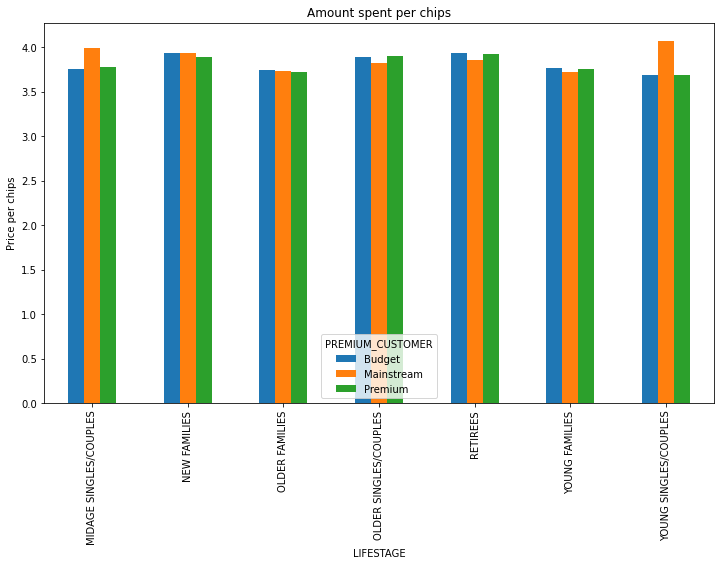

In [ ]:
#Visualisation of amount spent on a packet of chips by a customer segment
avg_chip_price.unstack().plot(kind='bar',stacked=False,figsize=(12,7),title='Amount spent per chips')
plt.ylabel('Price per chips')

In [ ]:

#Creating a new column for price per packet
PRICE_PER_PKT=customer_transactions
customer_transactions['PRICE_PER_PKT']=customer_transactions['TOT_SALES'] / customer_transactions['PROD_QTY']
customer_transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_OF_PACK,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE_PER_PKT
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Ncc,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,Ccs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2018-11-10,1,1307,346,96,Ww Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget,1.90
3,2019-03-09,1,1307,347,54,Ccs Original,1,2.1,175,Ccs,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45


In [ ]:
#Mainstream and Non_Mainstream segmentation
Mainstream=PRICE_PER_PKT.loc[(PRICE_PER_PKT['PREMIUM_CUSTOMER'] == 'Mainstream') & ((PRICE_PER_PKT['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (PRICE_PER_PKT['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES')), 'PRICE_PER_PKT']
Non_Mainstream=PRICE_PER_PKT.loc[(PRICE_PER_PKT['PREMIUM_CUSTOMER'] != 'Mainstream') & ((PRICE_PER_PKT['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (PRICE_PER_PKT['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES')), 'PRICE_PER_PKT']




In [ ]:
np.mean(Mainstream)

4.039785893795137

In [ ]:
np.mean(Non_Mainstream)

3.706491319963857

In [ ]:
#Perform an independent t-test between mainstream vs non-mainstream midage and young singles/couples to test the significant difference in price
from scipy.stats import ttest_ind
ttest_ind(Mainstream,Non_Mainstream)

Ttest_indResult(statistic=37.83196107667825, pvalue=2.235645611540966e-309)

In [ ]:
#Assigning target groups to Mainstream Young Singles/Couples against Budget & Premium counterparts
target_group= customer_transactions.loc[(customer_transactions['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (customer_transactions['PREMIUM_CUSTOMER'] == 'Mainstream'), :]
non_target_group=customer_transactions.loc[(customer_transactions['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES') & (customer_transactions['PREMIUM_CUSTOMER'] != 'Mainstream'), :]
target_group.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_OF_PACK,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE_PER_PKT
221345,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snagsauce,1,2.6,150,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
221346,2018-10-02,1,1020,27,7,Smiths Crinkle Original,1,5.7,330,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.7
221347,2019-05-02,1,1020,28,84,Grnwves Plus Btroot Chilli Jam,1,3.1,180,Grainwaves,YOUNG SINGLES/COUPLES,Mainstream,3.1
221348,2018-08-17,1,1163,188,46,Kettle Original,1,5.4,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
221349,2019-02-07,1,1163,189,12,Natural Chip Co Tmato Hrbspce,1,3.0,175,Ncc,YOUNG SINGLES/COUPLES,Mainstream,3.0


**BRAND PREFERENCE**

In [ ]:
#Establishing brand preference of MainStream Young Singles/Couples against Budget & Premium counterparts
#Target Segment
targetBrand = target_group.loc[:, ['BRAND', 'PROD_QTY']]
targetSum = targetBrand['PROD_QTY'].sum()
targetBrand['Target Brand Preference'] = targetBrand['PROD_QTY'] / targetSum
targetBrand = pd.DataFrame(targetBrand.groupby('BRAND')['Target Brand Preference'].sum())
targetBrand.head()

,Target Brand Preference
BRAND,
Burger,0.002926
Ccs,0.011180
Cheetos,0.008033
Cheezels,0.017971
Cobs,0.044638


In [ ]:
#non_target_group
nonTargetBrand = non_target_group.loc[:, ['BRAND', 'PROD_QTY']]
nonTargetSum = nonTargetBrand['PROD_QTY'].sum()
nonTargetBrand['Non-Target Brand Preference'] = nonTargetBrand['PROD_QTY'] / nonTargetSum
nonTargetBrand = pd.DataFrame(nonTargetBrand.groupby('BRAND')['Non-Target Brand Preference'].sum())
nonTargetBrand.head()

,Non-Target Brand Preference
BRAND,
Burger,0.006538
Ccs,0.018445
Cheetos,0.011759
Cheezels,0.018904
Cobs,0.038449


In [ ]:
#Merging the target and non target groups
brand_preferences=pd.merge(targetBrand,nonTargetBrand,left_index=True,right_index=True)
brand_preferences.head()

,Target Brand Preference,Non-Target Brand Preference
BRAND,,
Burger,0.002926,0.006538
Ccs,0.011180,0.018445
Cheetos,0.008033,0.011759
Cheezels,0.017971,0.018904
Cobs,0.044638,0.038449


In [ ]:
brand_preferences['Preference to Brand'] = brand_preferences['Target Brand Preference'] / brand_preferences['Non-Target Brand Preference']
brand_preferences.sort_values(by = 'Preference to Brand', ascending = False)

,Target Brand Preference,Non-Target Brand Preference,Preference to Brand
BRAND,,,
Tyrrells,0.031553,0.025715,1.227025
Twisties,0.046184,0.037933,1.217506
Doritos,0.122761,0.101171,1.213397
Kettle,0.197985,0.166560,1.188667
Tostitos,0.045411,0.038350,1.184100
Pringles,0.119420,0.101110,1.181090
Cobs,0.044638,0.038449,1.160959
Infuzions,0.064679,0.057410,1.126622
Thins,0.060373,0.057159,1.056217


**PACKET_SIZE PREFERENCE**

In [ ]:
#target group
targetSize = target_group.loc[:, ['SIZE_OF_PACK', 'PROD_QTY']]
targetSum = targetSize['PROD_QTY'].sum()
targetSize['Target Size Preference'] = targetSize['PROD_QTY'] / targetSum
targetSize= pd.DataFrame(targetSize.groupby('SIZE_OF_PACK')['Target Size Preference'].sum())
targetSize.head()

,Target Size Preference
SIZE_OF_PACK,
70,0.003037
90,0.006349
110,0.106280
125,0.003009
134,0.119420


In [ ]:
#non_target group
nontargetSize = non_target_group.loc[:, ['SIZE_OF_PACK', 'PROD_QTY']]
nontargetSum = nontargetSize['PROD_QTY'].sum()
nontargetSize['Non_Target Size Preference'] = nontargetSize['PROD_QTY'] / nontargetSum
nontargetSize= pd.DataFrame(nontargetSize.groupby('SIZE_OF_PACK')['Non_Target Size Preference'].sum())
nontargetSize.head()

,Non_Target Size Preference
SIZE_OF_PACK,
70,0.006284
90,0.012613
110,0.089575
125,0.005976
134,0.101110


In [ ]:
packet_size=pd.merge(targetSize,nontargetSize,left_index=True,right_index=True)
packet_size.head()

,Target Size Preference,Non_Target Size Preference
SIZE_OF_PACK,,
70,0.003037,0.006284
90,0.006349,0.012613
110,0.106280,0.089575
125,0.003009,0.005976
134,0.119420,0.101110


In [ ]:
packet_size['Packsize Preference'] = packet_size['Target Size Preference'] / packet_size['Non_Target Size Preference']
packet_size.sort_values(by = 'Packsize Preference', ascending = False)

,Target Size Preference,Non_Target Size Preference,Packsize Preference
SIZE_OF_PACK,,,
270,0.031829,0.025070,1.269608
380,0.032160,0.025711,1.250827
330,0.061284,0.050974,1.202243
110,0.106280,0.089575,1.186492
134,0.119420,0.101110,1.181090
210,0.029124,0.024891,1.170020
135,0.014769,0.012931,1.142086
250,0.014355,0.012863,1.115959
170,0.080773,0.080347,1.005300


In [ ]:
customer_transactions.loc[customer_transactions['SIZE_OF_PACK'] == 270,:]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_OF_PACK,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE_PER_PKT
34,2019-05-18,9,9208,8634,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
79,2018-08-24,39,39167,35639,113,Twisties Chicken,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
125,2019-05-06,54,54305,48304,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
132,2019-05-20,55,55073,48887,113,Twisties Chicken,1,4.6,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
209,2019-01-01,80,80182,78980,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246488,2018-07-27,259,259034,257623,113,Twisties Chicken,2,9.2,270,Twisties,YOUNG SINGLES/COUPLES,Premium,4.6
246521,2018-10-13,261,261110,260183,15,Twisties Cheese,2,9.2,270,Twisties,YOUNG SINGLES/COUPLES,Premium,4.6
246633,2019-04-04,266,266095,263934,113,Twisties Chicken,1,4.6,270,Twisties,YOUNG SINGLES/COUPLES,Premium,4.6
246655,2019-03-29,266,266420,264256,15,Twisties Cheese,2,9.2,270,Twisties,YOUNG SINGLES/COUPLES,Premium,4.6


In [ ]:
customer_transactions.loc[customer_transactions['SIZE_OF_PACK'] == 270, 'BRAND'].unique()

array(['Twisties'], dtype=object)

**SUMMARY**


*   Budget older families, mainstream young singles/couples and premium older singles/couples contribute to a majority of sales

* Mainstream young singles/couples are the largest group with the highest number of customers while Premium new families are the smallest group with lowest number of customers

*   On average,older families and younger families purchase more chips
Mainstream midage and young singles/couples are willing to pay more per packet of chips 

* The group that should be targeted to boost even more sales is the young singles/couples who prefer Tyrells brand and have affinity to the 270g packet size of chips

* Twisties is the only brand that produces 270g packet size of chips



